### Name: Hashem Almubarak - ID: 202012260 - Major: Software Engineering 
### Name: Ali Alsaihati - ID: 202034820 - Major: Software Engineering       

 ## ---------------------------------Data Analysis Competition---------------------------------

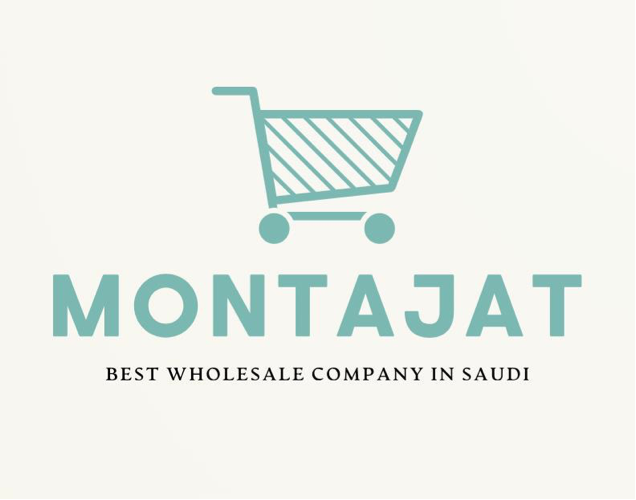

# Libraries

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data Exploration

## Reading Data

In [95]:
data = pd.read_csv('Montajat Data.csv', header=2) # Reading the data and set the second row as a header

In [96]:
data.head(100)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3,12669.0,9656.0,7561.0,214.0,2674.0,1338.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,3,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
95,Two,Three,44466.0,54259.0,55571.0,7782.0,24171.0,6465.0
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,Two,3,11519.0,6152.0,10868.0,584.0,5121.0,1476.0
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Channel           456 non-null    object 
 1   Region            455 non-null    object 
 2   Fresh             454 non-null    float64
 3   Milk              456 non-null    float64
 4   Grocery           456 non-null    float64
 5   Frozen            455 non-null    float64
 6   Detergents_Paper  455 non-null    float64
 7   Delicatessen      455 non-null    float64
dtypes: float64(6), object(2)
memory usage: 57.2+ KB


In [98]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,454.000000,456.000000,456.000000,455.000000,455.000000,455.000000
mean,11846.773128,5705.348684,7837.171053,3092.400000,2786.483516,1515.703297
std,12523.575795,7253.948048,9280.126767,4829.889803,4643.549533,2783.774490
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3072.000000,1525.250000,2146.750000,770.500000,255.500000,405.000000
50%,8413.500000,3607.500000,4751.000000,1535.000000,788.000000,961.000000
75%,16905.500000,7119.000000,10689.750000,3635.000000,3858.500000,1825.500000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## Cleaning Data

In [99]:
print(data["Channel"].unique())
print(data["Region"].unique())

[nan '2' '1' 'Two' 'One']
[nan '3' 'Three' '1' '2']


In [100]:
# Using data["column_name"].unique(), It's been found that:

## Some records have nan values need to be removed
# Drop rows with missing values
data = data.dropna()

# Convert string values in 'Channel' and 'Region' columns to digits
data.loc[data['Channel'] == "One", 'Channel'] = "1"
data.loc[data['Channel'] == "Two", 'Channel'] = "2"
data.loc[data['Region'] == "Three", 'Region'] = "3"

# Check for duplicate rows
duplicates = data.duplicated()
if duplicates.sum() > 0:
    print("Duplicates found!")
    data.drop_duplicates(inplace=True)

# Check for missing values
cols_with_na = [col for col in data.columns if data[col].isnull().sum() > 0]
print(f"Columns with missing values: {cols_with_na}")

# Impute missing values with mode
for col in cols_with_na:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Check column datatypes
for col in data.columns:
    print(f"{col} - {data[col].dtype}")

# Convert columns to appropriate datatypes
data[['Channel', 'Region']] = data[['Channel', 'Region']].astype('category')
data[[col for col in data if data[col].dtype == 'object']] = data[
    [col for col in data if data[col].dtype == 'object']
].astype('string')

# Separate numeric and categorical columns
num_cols = data.select_dtypes(include=['int', 'float']).columns
cat_cols = data.select_dtypes(include=['category']).columns

# Check for outliers in numeric data
for col in num_cols:
    print(f"{col} min-max:", data[col].min(), "-", data[col].max())


Duplicates found!
Columns with missing values: []
Channel - object
Region - object
Fresh - float64
Milk - float64
Grocery - float64
Frozen - float64
Detergents_Paper - float64
Delicatessen - float64
Fresh min-max: 3.0 - 112151.0
Milk min-max: 55.0 - 73498.0
Grocery min-max: 3.0 - 92780.0
Frozen min-max: 25.0 - 60869.0
Detergents_Paper min-max: 3.0 - 40827.0
Delicatessen min-max: 3.0 - 16523.0


This code performs the following steps:

Drops rows with missing values using the dropna() function.
Converts specific string values in the 'Channel' and 'Region' columns to digits for consistency.
Checks for duplicate rows using the duplicated() function and removes them if found.
Checks for missing values in each column and prints the columns with missing values.
Imputes missing values with the mode of each column using the fillna() function.
Checks the data types of each column and prints them.
Converts the 'Channel' and 'Region' columns to the 'category' data type and other object columns to the 'string' data type.
Separates numeric and categorical columns for further analysis.
Checks for outliers in numeric data by printing the minimum and maximum values for each numeric column.

# Category Insights:

## "Average Spending"

Using a bar chart, the code visualizes the average annual spending for various product categories and identifies the category with the highest average spending.

The product category with the highest average annual spending is: Fresh



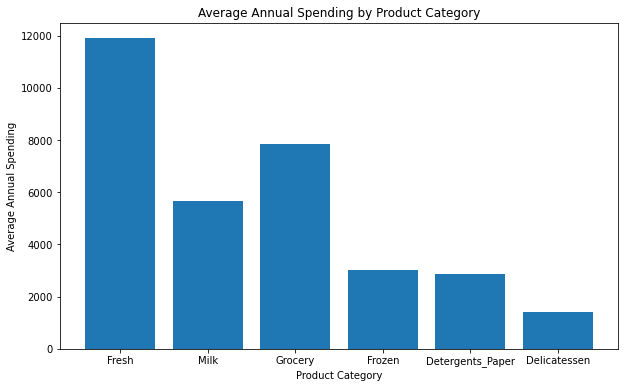

In [101]:
# Calculate the average annual spending for each product category
category_average = data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']].mean()

# Find the product category with the highest average spending
highest_spending_category = category_average.idxmax()

# Print the result
print("The product category with the highest average annual spending is:", highest_spending_category)
print()

# Plotting the average spending for each category
plt.figure(figsize=(10, 6))
plt.bar(category_average.index, category_average)
plt.xlabel("Product Category")
plt.ylabel("Average Annual Spending")
plt.title("Average Annual Spending by Product Category")
plt.show()

The output indicates that the 'Fresh' category has the highest average annual spending among the product categories analyzed.

Understanding the product category with the highest average spending in Montajat enables better inventory management, targeted marketing efforts, stronger supplier relationships, identification of growth opportunities, and streamlined operations. These factors contribute to Montajat's success as a leading wholesale distributor in Saudi Arabia, meeting the diverse needs of its clientele effectively.

# Customer Segment Analysis: 

## "Spending Distribution by Channel"

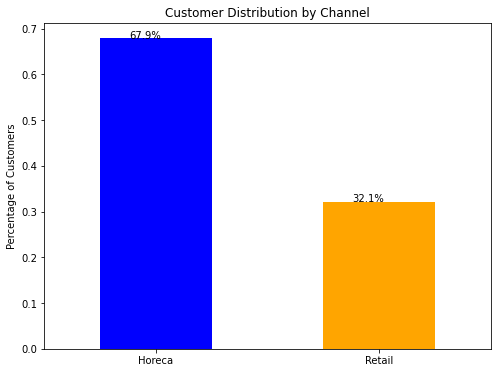

In [102]:
import numpy as np
import matplotlib.pyplot as plt

# Add channel labels for clarity
channels = ['Horeca', 'Retail']

# Count occurrences of each channel
channel_counts = data['Channel'].value_counts()

# Normalize counts to percentages
channel_percentages = channel_counts / channel_counts.sum()

# Plot bar chart
fig, ax = plt.subplots(figsize=(8, 6))
channel_percentages.plot(kind='bar', color=['blue', 'orange'])

# Format plot
plt.xticks(rotation=0)
ax.set_ylabel('Percentage of Customers')
ax.set_title('Customer Distribution by Channel')
ax.set_xticklabels(channels)

# Add percentage labels
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height())
    x = p.get_x() + p.get_width() / 2 - 0.05
    ax.text(x, p.get_height(), percentage, ha='center')

# Show plot
plt.show()

Analyzing the distribution of customers between the Horeca and Retail channels in Montajat's Wholesale Customer Data can provide valuable insights for the leading wholesale distributor. It can help Montajat understand the customer preferences and market segment distribution, allowing them to tailor their product offerings, marketing strategies, and operational efficiency to meet the diverse needs of their clientele more effectively.

## "Spending Distribution by Region"

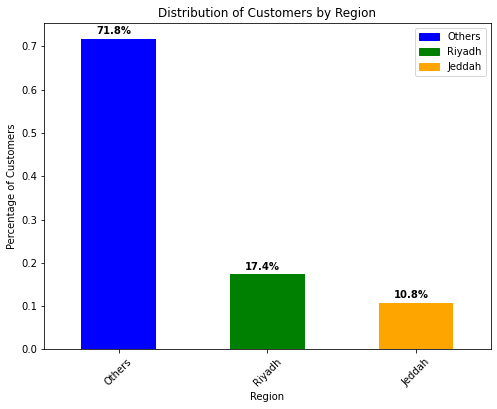

In [103]:
import numpy as np
import matplotlib.pyplot as plt

# Normalize counts to percentages
region_counts = data['Region'].value_counts(normalize=True)

# Plot bar chart with different colors
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['blue', 'green', 'orange']  # Define colors for each category
region_counts.plot(kind='bar', color=colors)

# Set legend properties
regions = region_counts.index
legend_labels = ['Others', 'Riyadh', 'Jeddah']  # Define legend labels for each category
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
plt.legend(legend_handles, legend_labels, loc='upper right')

# Add numerical labels to bars
for i, v in enumerate(region_counts):
    plt.text(i - 0.15, v + 0.01, str(round(v * 100, 1)) + '%', color='black', fontweight='bold')

# Change x-tick labels to real names
real_names = ['Others', 'Riyadh', 'Jeddah']  # Define real names for each category
plt.xticks(np.arange(len(regions)), real_names, rotation=45)

# Format plot
plt.xlabel("Region")
plt.ylabel("Percentage of Customers")
plt.title("Distribution of Customers by Region")

# Show plot
plt.show()

it directs operational improvements to most cost-effectively serve customer concentrations while also uncovering expanding regional potential for long-term business planning.

# Additional Information

## "The lowest average annual spending"

In [104]:
print(data.select_dtypes(include=['number']).mean().idxmin()) 

Delicatessen


# Correlation Analysis:

Correlation Matrix:
                     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Fresh             1.000000  0.081614 -0.017301  0.338017         -0.100260   
Milk              0.081614  1.000000  0.730902  0.043961          0.682401   
Grocery          -0.017301  0.730902  1.000000 -0.068418          0.926561   
Frozen            0.338017  0.043961 -0.068418  1.000000         -0.135671   
Detergents_Paper -0.100260  0.682401  0.926561 -0.135671          1.000000   
Delicatessen      0.281093  0.352586  0.251893  0.224215          0.141246   

                  Delicatessen  
Fresh                 0.281093  
Milk                  0.352586  
Grocery               0.251893  
Frozen                0.224215  
Detergents_Paper      0.141246  
Delicatessen          1.000000  



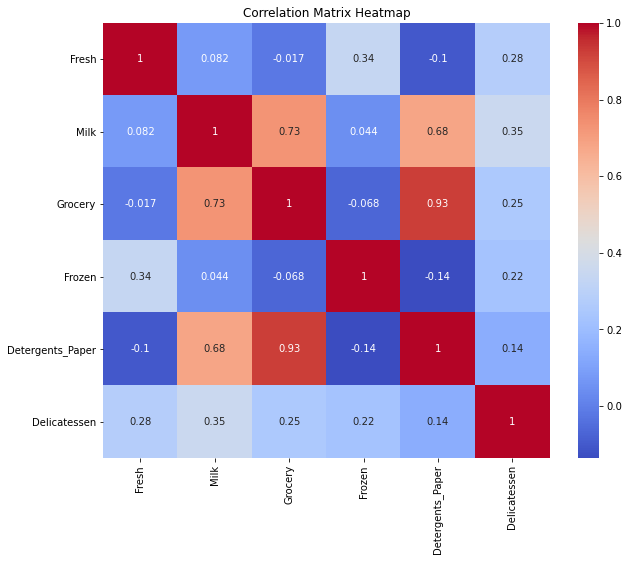

In [105]:
# Calculate the correlation matrix
correlation_matrix = data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)
print()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

# Channel-specific Insights & Regional Analysis:

                     Horeca     Retail
Fresh             3952331.0  1236130.0
Milk               979911.0  1489187.0
Grocery           1155456.0  2270556.0
Frozen            1080225.0   229734.0
Detergents_Paper   235338.0  1008857.0
Delicatessen       373672.0   246061.0


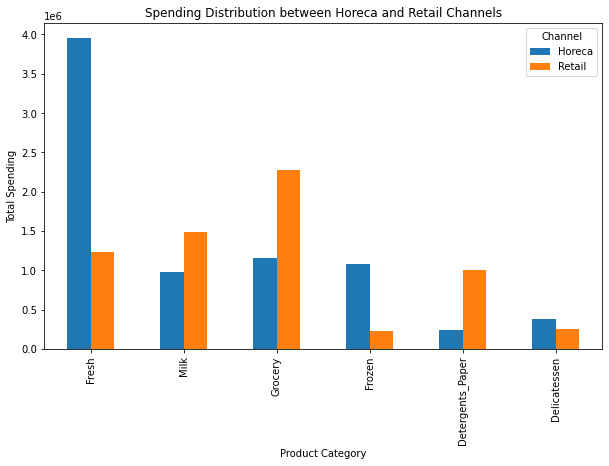

                    Riyadh    Jeddah      Other
Fresh             842714.0  464721.0  3881026.0
Milk              394128.0  239144.0  1835826.0
Grocery           530343.0  433274.0  2462395.0
Frozen            226290.0  190132.0   893537.0
Detergents_Paper  184726.0  173311.0   886158.0
Delicatessen      101457.0   54506.0   463770.0


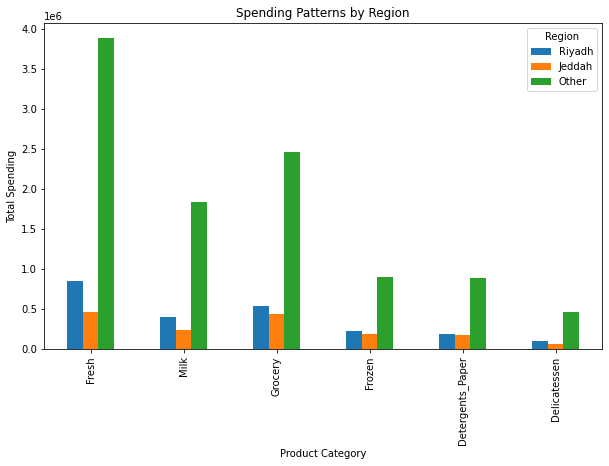

In [106]:

# Calculate spending distribution between Horeca and Retail channels
channel_spending = pd.DataFrame({
    'Horeca': data[data['Channel'] == "1"][['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']].sum(),
    'Retail': data[data['Channel'] == "2"][['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']].sum()
})
print(channel_spending)

# Visualize spending distribution between channels
channel_spending.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Product Category')
plt.ylabel('Total Spending')
plt.title('Spending Distribution between Horeca and Retail Channels')
plt.legend(title='Channel')
plt.show()

# Perform spending pattern analysis by region
region_spending = pd.DataFrame({
    'Riyadh': data[data['Region'] == "1"][['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']].sum(),
    'Jeddah': data[data['Region'] == "2"][['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']].sum(),
    'Other': data[data['Region'] == "3"][['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']].sum()
})
print(region_spending)

# Visualize spending patterns by region
region_spending.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Product Category')
plt.ylabel('Total Spending')
plt.title('Spending Patterns by Region')
plt.legend(title='Region')
plt.show()

In [107]:

# Calculate total spending for each channel and product category
channel_category_spending = data.groupby(['Channel'])[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']].sum()

# Identify the top three product categories in terms of spending for each channel
top_categories = channel_category_spending.apply(lambda x: x.nlargest(3).index.tolist(), axis=1)

# Print the top three product categories for each channel
for channel in top_categories.index:
    print(f"Top three product categories for {channel} channel: {', '.join(top_categories.loc[channel])}")

# Determine if there are specific product categories that perform exceptionally well in a particular channel
for channel in top_categories.index:
    top_category = top_categories.loc[channel][0]
    other_channels = top_categories.drop(channel)
    other_channels_top_categories = other_channels.apply(lambda x: x[0])
    if top_category not in other_channels_top_categories.tolist():
        print(f"The product category '{top_category}' performs exceptionally well in the {channel} channel.")

Top three product categories for 1 channel: Fresh, Grocery, Frozen
Top three product categories for 2 channel: Grocery, Milk, Fresh
The product category 'Fresh' performs exceptionally well in the 1 channel.
The product category 'Grocery' performs exceptionally well in the 2 channel.


In [108]:

# Calculate total spending for each region and product category
region_category_spending = data.groupby(['Region'])[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']].sum()

# Identify the region with the highest overall spending
highest_spending_region = region_category_spending.sum(axis=1).idxmax()

if highest_spending_region == 1:
    highest_spending_region = "Riyadh"
elif highest_spending_region == 2:
    highest_spending_region = "Jeddah"
else:
    highest_spending_region = "Other"

# Print the region with the highest overall spending
print(f"The region with the highest overall spending is: {highest_spending_region}")

# Identify the dominating product categories in each region
dominating_categories = region_category_spending.idxmax(axis=1)

# Print the dominating product categories in each region
for region in dominating_categories.index:
    print(f"The dominating product category in {'Riyadh' if region == '1' else 'Jeddah' if region == '2' else 'Other'} region is: {dominating_categories.loc[region]}")

The region with the highest overall spending is: Other
The dominating product category in Riyadh region is: Fresh
The dominating product category in Jeddah region is: Fresh
The dominating product category in Other region is: Fresh
